In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

## Вопрос 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Ответ

Насчет 1% прокурор прав - это вероятность того, что на месте преступления была бы такая группа крови при условии невиновности подсудимого.

Отсюда 99% - вероятность события, что на месте преступления была бы другая группа крови при условии невиновности подсудимого, а не то, что озвучил прокурор.

Надо оценить вероятность виновности подсудимого при условии того, что на месте преступления обнаружена та же группа крови, что и у подсудимого.

Далее обозначения событий: $guilty$ --- виновен, $same\_blood$ --- вероятность обнаружения той же группы крови.

Рассмотрим следующие выкладки, приняв как произошедший факт, что у подсудимого обнаружена редкая группа крови:


$$ \mathbf{P} (guilty | same\_blood) = \frac{\mathbf{P} (same\_blood | guilty) \cdot \mathbf{P}(guilty)}{\mathbf{P} (same\_blood)} = $$

$$ = \frac{\mathbf{P} (same\_blood | guilty) \cdot \mathbf{P}(guilty)}{\mathbf{P} (same\_blood | guilty) \cdot \mathbf{P}(guilty) + \mathbf{P} (same\_blood | not\_guilty) \cdot \mathbf{P}(not\_guilty)} = $$

$$ = \frac{1 \cdot \mathbf{P}(guilty)}{1 \cdot \mathbf{P}(guilty) + 0.01 \cdot \mathbf{P}(not\_guilty)} = $$

$$ = \frac{\mathbf{P}(guilty)}{\mathbf{P}(guilty) + 0.01 \cdot \mathbf{P}(not\_guilty)} = $$

$$ = \frac{\mathbf{P}(guilty)}{\mathbf{P}(guilty) + 0.01 \cdot (1 - \mathbf{P}(not\_guilty))} = $$

$$ = \frac{\mathbf{P}(guilty)}{0.01 + 0.99 \cdot \mathbf{P}(guilty)} . $$

Построим график зависимости апостериорной вероятности виновновности подсудимого от априорной:

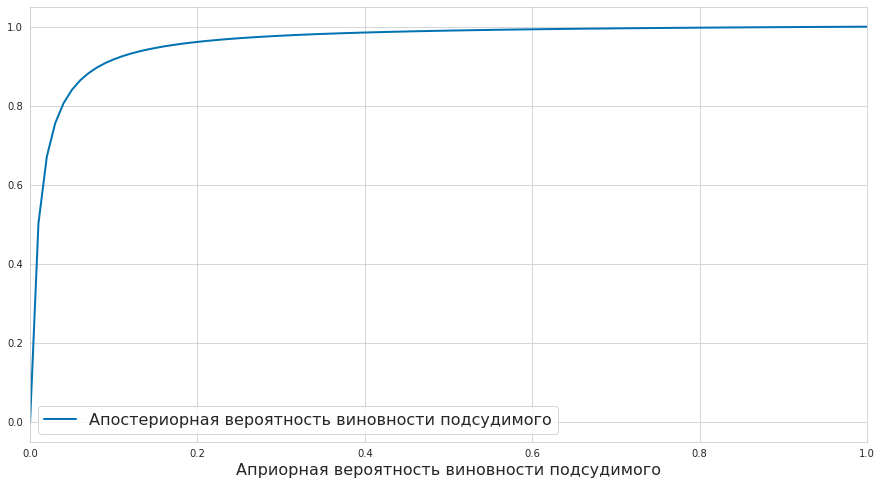

In [14]:
vector_posterior = lambda x: x / (0.01 + 0.99 * x)
xs = np.arange(0, 1.01, 0.01)
ys = vector_posterior(xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys, linewidth=2, label=r'Апостериорная вероятность виновности подсудимого')
ax.set_xlim((0.0, 1.0))
ax.set_xlabel('Априорная вероятность виновности подсудимого', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()

Из графика видно, что факт обнаружения редкой группы крови --- серьезная улика, т.е. если до обнаружения этого факта следствие было не уверено, виновен ли подсудимый, например, априорная вероятность виновности была бы равна 0.5, то после эксперимента апостерионая вероятность была бы равна более чем 99%.

С другой стороны, если бы имелись серьезные улики в пользу невиновности клиента, и, например, априорная вероятность виновности равна 1%, то после эксперимента апостериорная вероятность приняла бы значение около 50%, что относительно не так уж и страшно для подсудимого.

## Вопрос 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Ответ

Адвокат оценил вероятность того, что убийство совершил подсудимый при условии, что в убийстве подозревались бы все горожане с необходимой группой крови, и подсудимый среди этих горожан ничем бы не выделялся относительно данного дела. Однако подсудимый не просто так является подсудимым, и, скорее всего, имеются еще свидетельства в пользу его виновности. Адвокату, как и в целом следствию, необходимо оценить апостериорную вероятность виновности/невиновости подозреваемого при условии обнаружения крови той же группы, как и у него, относительно априорной вероятности виновности подсудимого, определяемой предыдущими уликами, т.е. нужно оценить ту же самую величину, приведенную мной в прошлом пункте.


## Вопрос 3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


### Ответ

Обозначим событие выдачи тестом позитивного результата как $pos$, негативного --- $neg$, вероятность false positive ошибки --- $FP$, вероятность false negative ошибки --- $FN$, отсюда:

$$ \mathbf{P} (pos|ill) = 1 - FN , $$

$$ \mathbf{P} (pos|not\_ill) = FP , $$

$$ \mathbf{P} (neg|ill) = FN , $$

$$ \mathbf{P} (neg|not\_ill) = 1 - FP . $$

Выпишем апостериорные вероятности  оказаться больным при различных ответах теста в зависимости от величин разных ошибок и построим их в виде графиков:

$$ \mathbf{P} (ill | pos) = \frac{ (1 - FN) \cdot \mathbf{P}(ill)}{(1 - FN) \cdot \mathbf{P}(ill) + FP \cdot \mathbf{P}(not\_ill)} , $$

$$ \mathbf{P} (ill | neg) = \frac{ FN \cdot \mathbf{P}(ill)}{ FN \cdot \mathbf{P}(ill) + (1 - FP) \cdot \mathbf{P}(not\_ill)} . $$

In [3]:
def compute_posterior(data, prior_prob=0.01, fp_prob=0.05, fn_prob=0.05):
    if data == 1:
        return (prior_prob * (1 - fn_prob)) / (prior_prob * (1 - fn_prob) + (1-prior_prob) * fp_prob)
    elif data == 0:
        return (prior_prob * fn_prob) / (prior_prob * fn_prob + (1-prior_prob) * (1 - fp_prob))
    else:
        return None

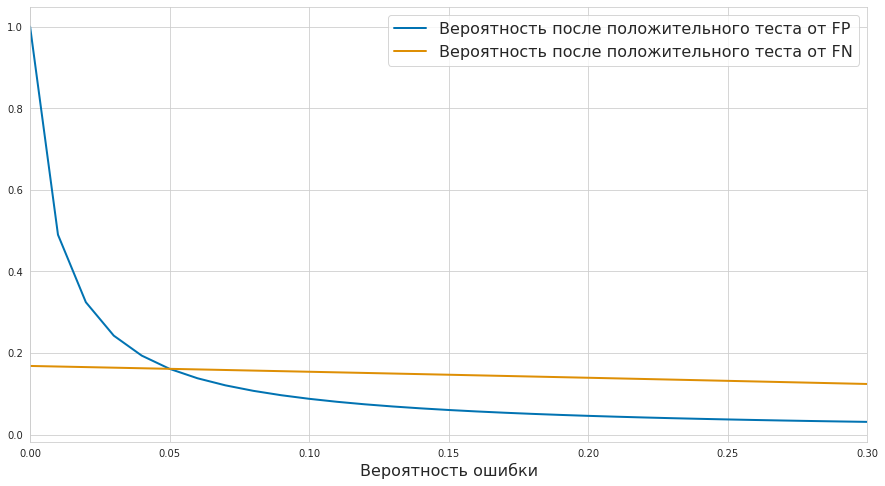

In [21]:
vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0, 0.31, 0.01)
ys_one = vector_posterior(1, fp_prob=xs)
ys_zero = vector_posterior(1, fn_prob=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста от FP')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после положительного теста от FN')
ax.set_xlim((0.0, 0.3))
ax.set_xlabel('Вероятность ошибки', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


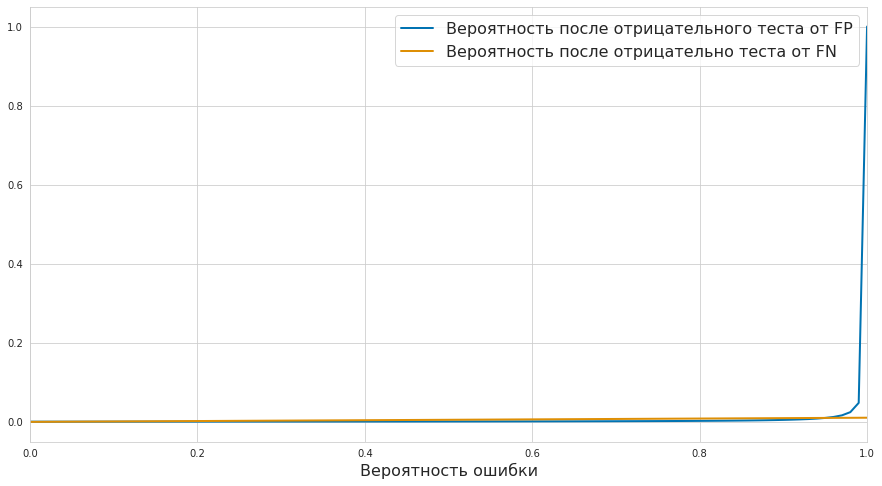

In [19]:
vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0, 1.01, 0.01)
ys_one = vector_posterior(0, fp_prob=xs)
ys_zero = vector_posterior(0, fn_prob=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после отрицательного теста от FP')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательно теста от FN')
ax.set_xlim((0.0, 1.0))
ax.set_xlabel('Вероятность ошибки', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

Из графиков видно, что заметно повлиять на апостериорную вероятность полезни можно изменяя число false positive ошибок. Например, уменьшив FP до 2%, значение апостериорной вероятности примет значение 32%. Изменение FN же в обоих случаях (положительный и отрицательный результаты теста) практически не влияют на значение апостериорной вероятности иметь болезнь. Данные результаты можно объяснить тем, что при относительно высокой априорной вероятности не иметь болезнь, для детекции больных необходимо иметь как можно более точный инструмент обнаружения болезни. Следовательно, медикам необходимо сосредоточиться на уменьшении числа false positive ошибок.